In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df  = pd.read_csv("./train_0OECtn8.csv")

In [3]:
df = df.iloc[:,2:]

## Getting Information from data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 8 columns):
category_id         89197 non-null int64
video_id            89197 non-null int64
age                 89197 non-null int64
gender              89197 non-null object
profession          89197 non-null object
followers           89197 non-null int64
views               89197 non-null int64
engagement_score    89197 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.4+ MB


In [5]:
df = df.astype({"gender": str, "profession": str})

In [6]:
df.describe()

,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [7]:
df["gender"].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

In [8]:
df = df.drop(df[(df["gender"] =="Male")].sample(frac=.3).index)

In [9]:
df["profession"].value_counts()

Student                 36694
Other                   22272
Working Professional    14512
Name: profession, dtype: int64

In [10]:
ax1 = df.groupby(['profession'])['gender'].value_counts().unstack().plot(kind='bar')

## Data Sampling 

In [11]:
#condition = (df["profession"] !="Student" ) & (df["gender"] !="Male")
#df = df.drop(df[(df["profession"] =="Student" ) & (df["gender"] =="Male")].sample(frac=.3).index)

In [12]:
#condition = (df["profession"] !="Student" ) & (df["gender"] !="Male")
#df = df.drop(df[(df["profession"] =="Other" ) & (df["gender"] =="Male")].sample(frac=.3).index)

In [13]:
#condition = (df["profession"] !="Student" ) & (df["gender"] !="Male")
#df = df.drop(df[(df["profession"] =="Working Professional" ) & (df["gender"] =="Male")].sample(frac=.3).index)

In [14]:
#ax1 = df.groupby(['profession'])['gender'].value_counts().unstack().plot(kind='bar')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73478 entries, 1 to 89196
Data columns (total 8 columns):
category_id         73478 non-null int64
video_id            73478 non-null int64
age                 73478 non-null int64
gender              73478 non-null object
profession          73478 non-null object
followers           73478 non-null int64
views               73478 non-null int64
engagement_score    73478 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.0+ MB


## Label Encoding of gender and profession

In [16]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder_1 = preprocessing.LabelEncoder()
label_encoder_2 = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['gender']= label_encoder_1.fit_transform(df['gender'])
df['profession']= label_encoder_2.fit_transform(df['profession'])

## one-Hot encoding on profession 

In [17]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['profession']]).toarray())
# merge with main df bridge_df on key values



In [18]:
df = df.reset_index(drop=True)
df = df.join(enc_df)
df.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score,0,1,2
0,32,132,14,0,1,330,714,1.79,0.0,1.0,0.0
1,12,24,19,1,1,180,138,4.35,0.0,1.0,0.0
2,23,112,19,1,1,220,613,3.77,0.0,1.0,0.0
3,23,112,27,1,2,220,613,3.13,0.0,0.0,1.0
4,25,139,35,1,0,240,317,3.33,1.0,0.0,0.0


In [19]:
df

,category_id,video_id,age,gender,profession,followers,views,engagement_score,0,1,2
0,32,132,14,0,1,330,714,1.79,0.0,1.0,0.0
1,12,24,19,1,1,180,138,4.35,0.0,1.0,0.0
2,23,112,19,1,1,220,613,3.77,0.0,1.0,0.0
3,23,112,27,1,2,220,613,3.13,0.0,0.0,1.0
4,25,139,35,1,0,240,317,3.33,1.0,0.0,0.0
5,8,100,18,1,1,280,628,3.87,0.0,1.0,0.0
6,3,4,15,1,1,270,621,2.88,0.0,1.0,0.0
7,5,161,19,1,1,240,229,3.80,0.0,1.0,0.0
8,12,88,18,0,1,180,138,3.73,0.0,1.0,0.0
9,28,75,30,1,2,250,414,3.13,0.0,0.0,1.0


## outliers detection 

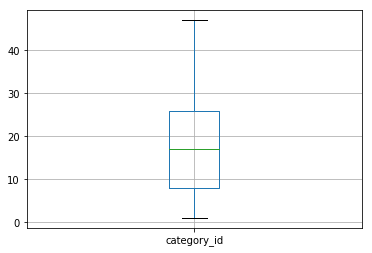

In [20]:
df.boxplot(column="category_id")

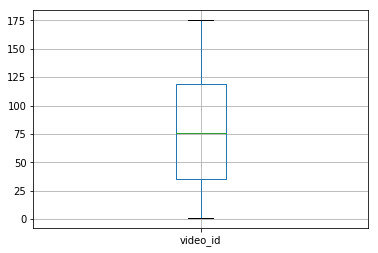

In [21]:
df.boxplot(column="video_id")

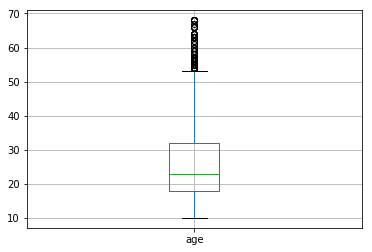

In [22]:
df.boxplot(column="age")

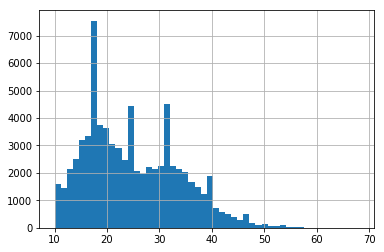

In [23]:
df["age"].hist(bins=50)

## using Log transformation with age

In [24]:
df["age"] = np.log(df["age"])

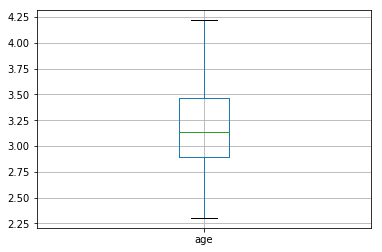

In [25]:
df.boxplot(column="age")

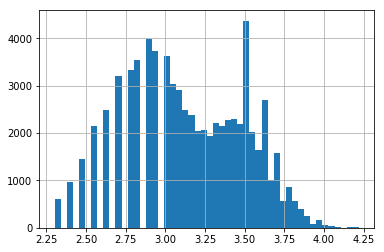

In [26]:
df["age"].hist(bins=50)

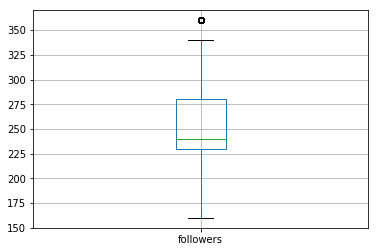

In [27]:
df.boxplot(column="followers")

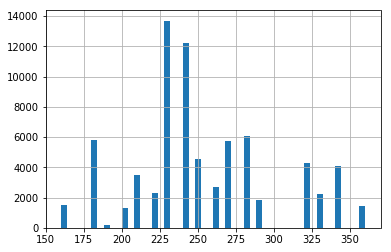

In [28]:
df["followers"].hist(bins=50)

## using Log transformation with Followers

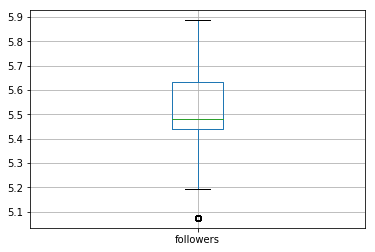

In [29]:
df["followers"] = np.log(df["followers"])
df.boxplot(column="followers")

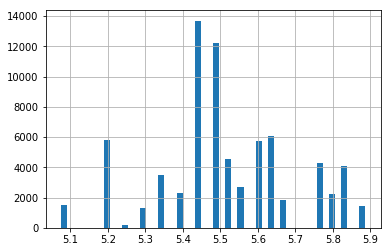

In [30]:
df["followers"].hist(bins=50)

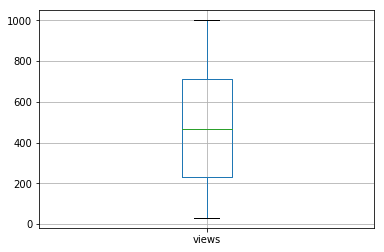

In [31]:
df.boxplot(column="views")

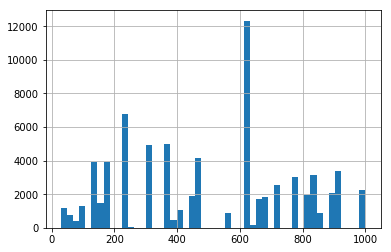

In [32]:
df["views"].hist(bins=50)

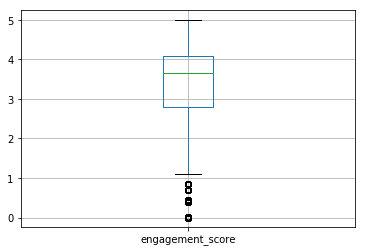

In [33]:
df.boxplot(column="engagement_score")

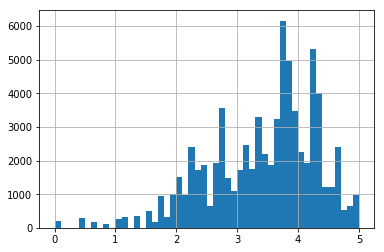

In [34]:
df["engagement_score"].hist(bins=50)

## Using Log Transformation with Score 

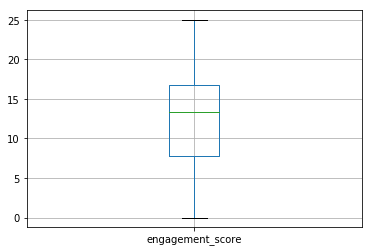

In [35]:
df["engagement_score"] =df["engagement_score"]**2 #square
#df["engagement_score"] = np.log(df["engagement_score"])
df.boxplot(column="engagement_score")

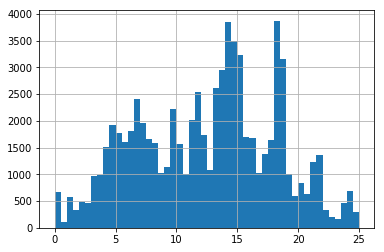

In [36]:
df["engagement_score"].hist(bins=50)

In [37]:
df["engagement_score"].skew()

-0.09813755844455715

In [38]:
df["CV"] = df["category_id"]*df["video_id"]
df["ag"] = df["age"]*df["gender"]
df["VIDF"] = df["video_id"]*df["followers"]
df["ag2"] = df["ag"]*df["views"]

## Feature Scalling 

In [39]:
#Min-Max Transformation
for i in df:
    if i!="engagement_score":
        df[i]=(df[i]-min(df[i]))/(max(df[i])-min(df[i]))

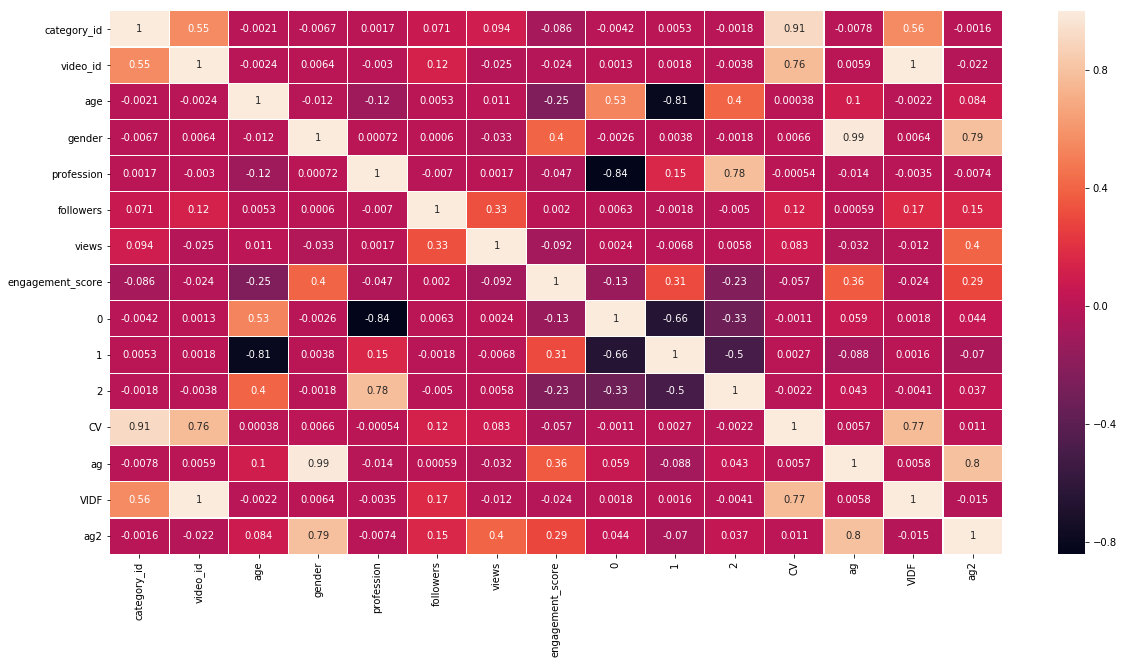

In [40]:
corr = df.corr()
import seaborn as sn
plt.pyplot.subplots(figsize=(20,10))
sn.heatmap(corr, annot=True,  linewidths=0.2)

## Train Test Split 

In [72]:
X = np.array(df[["age",0]])
Y = np.array(df[["engagement_score"]])
split_value=round(len(X) - len(X)*0.20)
x_train=X[:split_value]
x_test=X[split_value:]
y_train=Y[:split_value]
y_test=Y[split_value:]

In [73]:
x_train = x_train.transpose()  # n X m
y_train = y_train.transpose() #1 X m
x_test  = x_test.transpose()
y_test =  y_test.transpose()

[[13.40875317 13.9746839  11.00875218 ... 12.0940074  12.38906823
  14.41887254]]
Mean Squared Error is: 61.74106170931418


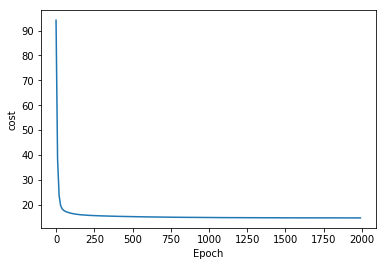

In [79]:
import matplotlib.pyplot as plt
class Regression:
    def __init__(self,x_train):
        self.slope = np.zeros((1,(x_train.shape[0]))) # 1 x n
        self.Intercept = 0
    def Hypothesis_fn(self,x_train):
        h = np.dot(self.slope,x_train)+ self.Intercept  #slope= 1xn  and x_train =nXm  so, h=1xm
        return h
    def Cost_Function(self,h,y_train):
        m= y_train.shape[1]
        J=((1/(2*m))*(np.sum(np.square(h - y_train)))) #h=1xm y_train= 1xm
        return J
    def Gradient_descent(self,h,x_train,y_train):
        m = y_train.shape[1]
        dIntercept = (1/m)*(np.sum(h-y_train))
        dslope = (1/m)*np.dot((h-y_train),x_train.transpose())  # (h-y_train)=1xm x_train= mXn dslope=1Xn
        return dslope,dIntercept
    def train(self,x_train,y_train,iteration,learning_rate):
        cost=[]
        epoch_list=[]
        for i in range(iteration):
            h=self.Hypothesis_fn(x_train)
            J=self.Cost_Function(h,y_train)
            g=self.Gradient_descent(h,x_train,y_train)
            self.slope = self.slope - (learning_rate * g[0]) # slope 1Xn
            self.Intercept = self.Intercept- (learning_rate * g[1])
            if(i%10==0):
                cost.append(J)
                epoch_list.append(i)
        plt.plot(epoch_list,cost) #k[1] = Iteration and  k[0] = Cost
        plt.xlabel("Epoch")
        plt.ylabel("cost")    
    def predict(self,x_test):
        y_predict=np.dot(self.slope,x_test)+ self.Intercept
        return y_predict
        

epoch=2000
learning_rate=0.05
rg=Regression(x_train) # object Creation
rg.train(x_train,y_train,epoch,learning_rate)  # Train the Model
y_predict=rg.predict(x_test)  # make Prediction
mse_scratch= np.sum(y_predict-y_test)  # Calculate mean squared Error
print(y_predict)
print("Mean Squared Error is:",mse_scratch)

In [46]:
#from sklearn.linear_model import LinearRegression
#Linear=LinearRegression()
#Linear.fit(X,Y)
#Linear.fit(x_train.transpose(),y_train.transpose())
#y_predict=Linear.predict(x_test.transpose())
#mse_scikit= np.sum(y_predict-y_test)
#print("Mean Squared Error is:",mse_scikit)

Mean Squared Error is: -3153871.1217989055


In [80]:
y_predict

array([[13.40875317, 13.9746839 , 11.00875218, ..., 12.0940074 ,
        12.38906823, 14.41887254]])

In [81]:
#Linear.score(x_test,y_test)

In [82]:
x_test.shape

(2, 14696)

## Test Data development 

In [83]:
df_test = pd.read_csv("./test_1zqHu22.csv")
df_test = df_test.iloc[:,:]
df_test = df_test.astype({"gender": str, "profession": str})

# Encode labels in column 'species'.
df_test['gender']= label_encoder_1.fit_transform(df_test['gender'])
df_test['profession']= label_encoder_2.fit_transform(df_test['profession'])

df_test["age"] = np.log(df_test["age"])
df_test["followers"] = np.log(df_test["followers"])
df_test

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,2.639057,1,1,5.192957,138
1,89199,11278,34,115,2.639057,1,1,5.438079,840
2,89200,17245,8,110,3.784190,0,2,5.634790,628
3,89201,9851,16,137,2.890372,1,1,5.598422,462
4,89202,16008,34,96,3.850148,0,0,5.438079,840
5,89203,5291,42,134,3.135494,1,1,5.669881,689
6,89204,22128,5,109,3.496508,1,0,5.480639,229
7,89205,23490,16,137,3.258097,0,1,5.598422,462
8,89206,4833,21,123,3.332205,0,0,5.768321,909
9,89207,12450,19,44,2.564949,1,1,5.438079,369


## oneHot encoding on proffession 

In [84]:
enc_df = pd.DataFrame(enc.fit_transform(df_test[['profession']]).toarray())
# merge with main df bridge_df on key values

df_test = df_test.reset_index(drop=True)
df_test = df_test.join(enc_df)
df_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,0,1,2
0,89198,7986,12,42,2.639057,1,1,5.192957,138,0.0,1.0,0.0
1,89199,11278,34,115,2.639057,1,1,5.438079,840,0.0,1.0,0.0
2,89200,17245,8,110,3.784190,0,2,5.634790,628,0.0,0.0,1.0
3,89201,9851,16,137,2.890372,1,1,5.598422,462,0.0,1.0,0.0
4,89202,16008,34,96,3.850148,0,0,5.438079,840,1.0,0.0,0.0


## Feature scalling

In [85]:
#Min-Max Transformation
for i in df_test:
    if i!="row_id":
        df_test[i]=(df_test[i]-min(df_test[i]))/(max(df_test[i])-min(df_test[i]))

In [86]:
X_Sample_test = np.array(df_test[["age",0,1,2]])
y_sample_predict= rg.predict(X_Sample_test.transpose())

ValueError: shapes (1,2) and (4,11121) not aligned: 2 (dim 1) != 4 (dim 0)

In [52]:
y_sample_predict = np.sqrt(y_sample_predict)

In [55]:
y_sample_predict

array([[3.74853967, 3.74853967, 3.19217333, ..., 3.80707413, 3.38523446,
        3.14777318]])

In [57]:
df_test["engagement_score"] = y_sample_predict.transpose()

In [58]:
df_test = df_test[["row_id","engagement_score"]]

In [59]:
df_test

,row_id,engagement_score
0,89198,3.748540
1,89199,3.748540
2,89200,3.192173
3,89201,3.781198
4,89202,3.435964
5,89203,3.812782
6,89204,3.385234
7,89205,3.828482
8,89206,3.361405
9,89207,3.738855


In [60]:
df_test.to_csv("./10th_age_012Scrattch.csv",index=False)